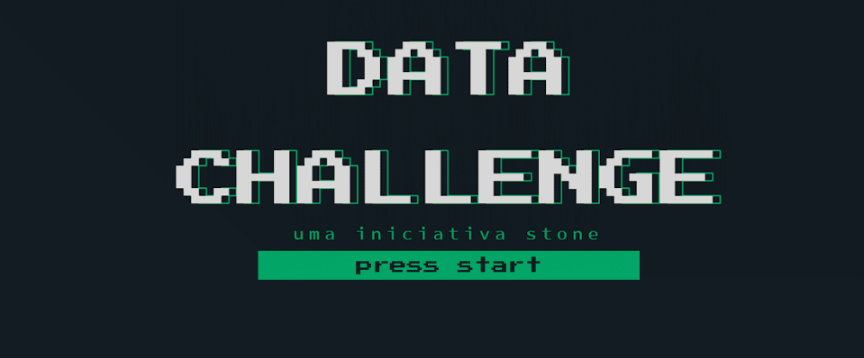

In [4]:
Image( '../../images/data_challenge.png')

# 0.0. IMPORTS

In [2]:
import pandas          as pd
import seaborn         as sns
import plotly.express  as px

from IPython.core.display import HTML
from IPython.core.display import Image
from datetime             import datetime

from matplotlib           import pyplot as plt

## 0.1. Funções Auxiliares

In [2]:
# jupyter design
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = 20

    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.4f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    sns.set()
    
jupyter_settings()

# estatística descritva para variáveis numéricas
def estatistica_descritiva_numerica( df_num ):
    pd.set_option('display.float_format', lambda x: '%.4f' % x)

    # central tendency - mean, median
    ct1 = pd.DataFrame( df_num.apply( lambda x: np.mean( x ) ) ).T
    ct2 = pd.DataFrame( df_num.apply( lambda x: np.median( x ) ) ).T

    # dispersion metrics - min, max, range, std, skewness, kurtosis
    dm1 = pd.DataFrame( df_num.apply( lambda x: np.min( x ) ) ).T
    dm2 = pd.DataFrame( df_num.apply( lambda x: np.max( x ) ) ).T
    dm3 = pd.DataFrame( df_num.apply( lambda x: np.max( x ) - np.min( x ) ) ).T
    dm4 = pd.DataFrame( df_num.apply( lambda x: np.std( x ) ) ).T
    dm5 = pd.DataFrame( df_num.apply( lambda x: x.skew() ) ).T
    dm6 = pd.DataFrame( df_num.apply( lambda x: x.kurtosis() ) ).T

    # concat
    df_description = pd.concat( [ dm1, dm2, dm3, ct1, ct2, dm4, dm5, dm6 ] ).T
    df_description.columns = ( 'min', 'max', 'range', 'mean', 'median', 'std', 'skewness', 'kurtosis' )
    
    return df_description

# estatística descritiva para dados temporais ( datas )
def estatistica_descritiva_data( date_features ):
    # Métricas de dispersão - mínimo, máximo, range

    min_ = pd.DataFrame( date_features.apply( lambda x: np.min( x ) ) ).T
    max_ = pd.DataFrame( date_features.apply( lambda x: np.max( x ) ) ).T
    range_ = pd.DataFrame( date_features.apply( lambda x: np.max( x ) - np.min( x ) ) ).T

    df_description = pd.concat( [ min_, max_, range_ ] ).T
    df_description.columns = [ 'min', 'max', 'range' ]
    
    return df_description

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\mathe\anaconda3\envs\dca2022\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 0.2. Datasets

In [3]:
df_portfolio_geral = pd.read_csv( '../../datasets/datasets_iniciais/portfolio_geral.csv' )
df_portfolio_clientes = pd.read_csv( '../../datasets/datasets_iniciais/portfolio_clientes.csv' )
df_portfolio_comunicados = pd.read_csv( '../../datasets/datasets_iniciais/portfolio_comunicados.csv' )
df_portfolio_tpv = pd.read_csv( '../../datasets/datasets_iniciais/portfolio_tpv.csv' )

# 1.0. DESCRIÇÃO DOS DADOS

## Portfolio Geral

**Resumo das ações realizadas**

- **Descrição das colunas:** Snakecase.

- **Dimensões dos dados:** Linhas: 8061006 / Colunas: 22.

- **Checagem de NA e substituição:** Não tem NA.

- **Tipos dos Dados e alteração:**

  - Alteração das colunas que representam data pra datetime64[ns], estavam como string.
  - Alteração da coluna prazo para inteiro.

- **Estatística descritiva:**
  - Dados numéricos:
    - **Problemas:**

      - Valor mínimo e mediana de valor tarifa igual a 0 - **RESOLVIDO AQUI**
      - Juros diário igual a 0 por conta do baixo número de casas decimais depois da vírgula declarado na função. Não é um problema, já verifiquei. - **RESOLVIDO AQUI**
      - Valor mínimo do pagamento realizado negativo e mediana igual a 0 - **RESOLVIDO APÓS MERGE COM TPV.**
      - Valor mínimo saldo devedor negativo e valor máximo acima do valor máximo desembolsado (Como? Seriam os juros?) - **RESOLVIDO APÓS MERGE COM TPV.**
      - Valor saldo devedor esperado máximo acima do valor desembolsado máximo ( Novamente, seriam os juros? ) - **RESOLVIDO APÓS MERGE COM TPV.**
    
  - Dados categóricos:
     - **Problemas:** Nenhum
     
  - Dados temporais (datas):
     - **Problemas:** Nenhum
     
- **Filtragem de dados:**

  - Função lambda na coluna valor tarifa pra substituir os 0 por 1% do valor do empréstimo.

In [4]:
# pra não ter que carregar todos os datasets de novo caso erre uma operação
portfolio_geral = df_portfolio_geral.copy()

### Info

In [5]:
portfolio_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061006 entries, 0 to 8061005
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   contrato_id                 object 
 1   dt_ref_portfolio            object 
 2   safra                       object 
 3   nr_documento                object 
 4   status_contrato             object 
 5   dt_contrato                 object 
 6   dt_desembolso               object 
 7   dt_vencimento               object 
 8   dt_wo                       object 
 9   prazo                       float64
 10  vlr_desembolsado            float64
 11  vlr_tarifa                  float64
 12  juros_mes                   float64
 13  juros_diario                float64
 14  perc_retencao               float64
 15  vlr_pgto_realizado          float64
 16  vlr_pgto_esperado           float64
 17  vlr_saldo_devedor           float64
 18  vlr_saldo_devedor_esperado  float64
 19  dsp                  

### Checagem de NA

In [6]:
portfolio_geral.isna().sum()

contrato_id                   0
dt_ref_portfolio              0
safra                         0
nr_documento                  0
status_contrato               0
dt_contrato                   0
dt_desembolso                 0
dt_vencimento                 0
dt_wo                         0
prazo                         0
vlr_desembolsado              0
vlr_tarifa                    0
juros_mes                     0
juros_diario                  0
perc_retencao                 0
vlr_pgto_realizado            0
vlr_pgto_esperado             0
vlr_saldo_devedor             0
vlr_saldo_devedor_esperado    0
dsp                           0
dspp                          0
flag_transacao                0
dtype: int64

#### Substituição de NA

Não tem NA.

### Alteração dos tipos dos Dados

In [7]:
# dt_ref_portfolio
portfolio_geral['dt_ref_portfolio']= pd.to_datetime( portfolio_geral['dt_ref_portfolio'] )

# safra
portfolio_geral['safra']= pd.to_datetime( portfolio_geral['safra'], format='%Y-%m' )

# dt_contrato
portfolio_geral['dt_contrato']= pd.to_datetime( portfolio_geral['dt_contrato'] )

# dt_desembolso
portfolio_geral['dt_desembolso']= pd.to_datetime( portfolio_geral['dt_desembolso'] )

# dt_vencimento
portfolio_geral['dt_vencimento']= pd.to_datetime( portfolio_geral['dt_vencimento'] )

# dt_wo
portfolio_geral['dt_wo']= pd.to_datetime( portfolio_geral['dt_wo'] )

# prazo
portfolio_geral['prazo'] = portfolio_geral['prazo'].astype( 'int64' )

### Estatística descritiva

In [8]:
num_features = portfolio_geral.select_dtypes( include=['int64', 'float64'])
cat_features = portfolio_geral.select_dtypes( include=['object'])
date_features = portfolio_geral.select_dtypes( include=['datetime64[ns]'])

#### Num attributes

In [9]:
estatistica_descritiva_numerica( num_features )

,min,max,range,mean,median,std,skewness,kurtosis
prazo,10.0000,35.0000,25.0000,24.6718,25.0000,6.1115,-0.5419,0.1130
vlr_desembolsado,171.0200,400225.5000,400054.4800,33879.3316,19165.6800,41763.0619,2.8480,10.4507
vlr_tarifa,0.0000,1710.0000,1710.0000,27.4337,0.0000,116.4810,7.4582,73.5776
juros_mes,0.0059,0.1079,0.1020,0.0620,0.0599,0.0194,0.4215,-0.4427
juros_diario,0.0002,0.0034,0.0032,0.0020,0.0019,0.0006,0.3898,-0.4651
perc_retencao,0.0114,1.2000,1.1886,0.2045,0.1518,0.2344,3.4755,11.8395
vlr_pgto_realizado,-44786.7300,210216.2500,255002.9800,62.4096,0.0000,387.5265,147.1325,48639.4107
vlr_pgto_esperado,0.5700,1134.0300,1133.4600,104.4081,63.9300,119.9776,2.6933,9.4064
vlr_saldo_devedor,-44613.3700,750102.7500,794716.1200,21129.4709,8076.4500,37265.8462,4.0660,26.0381
vlr_saldo_devedor_esperado,0.0000,401338.6900,401338.6900,14925.3676,4873.2600,27326.4458,3.9100,21.4135


**Problemas:**

- Valor mínimo e mediana de valor tarifa igual a 0 
- Juros diário igual a 0 por conta do baixo número de casas decimais depois da vírgula declarado na função. Não é um problema, já verifiquei.
- Valor mínimo do pagamento realizado negativo e mediana igual a 0
- Valor mínimo saldo devedor negativo e valor máximo acima do valor máximo desembolsado (Como? Seriam os juros?)
- Valor saldo devedor esperado máximo acima do valor desembolsado máximo ( Novamente, seriam os juros? )

#### Cat attributes

In [10]:
cat_features.describe()

,contrato_id,nr_documento,status_contrato
count,8061006,8061006,8061006
unique,14756,14265,6
top,f02c9ebf9ab574c82de0872e1c4d7791,5f5d72f03c0329dd7bcbfe1a633c52ec,Active
freq,838,2175,5642791


**Problemas:**

Nenhum

#### Date attributes

In [11]:
estatistica_descritiva_data( date_features )

,min,max,range
dt_ref_portfolio,2020-01-02,2022-04-18,837 days
safra,2020-01-01,2021-06-01,517 days
dt_contrato,2019-12-26,2021-06-18,540 days
dt_desembolso,2020-01-02,2021-06-28,543 days
dt_vencimento,2020-09-25,2023-03-09,895 days
dt_wo,2021-09-25,2024-03-08,895 days


**Problemas:**

Nenhum

### Filtragem dos dados

####  Valor mínimo e mediana de valor tarifa igual a 0

In [12]:
# contratos com tarifa 0 
portfolio_geral_tarifa_0 = portfolio_geral.loc[portfolio_geral['vlr_tarifa'] == 0]
print( 'Contratos com tarifa 0: {}'.format( portfolio_geral_tarifa_0.shape[0] ) )

# contratos com tarifa acima de 0
portfolio_geral_tarifa_diferente_0 = portfolio_geral.loc[portfolio_geral['vlr_tarifa'] != 0]
print( 'Contratos com tarifa acima de 0: {}'.format( portfolio_geral_tarifa_diferente_0.shape[0] ) )

Contratos com tarifa 0: 7040155
Contratos com tarifa acima de 0: 1020851


7.040.155 de registros estão sem o valor da tarifa de contratação, que é 1% do valor de empréstimo

In [13]:
# corrigindo valores faltantes
portfolio_geral['vlr_tarifa'] = portfolio_geral['vlr_desembolsado'].apply( lambda x: x*0.01 )

#### Juros diário igual a 0 por conta do baixo número de casas decimais depois da vírgula declarado na função. Não é um problema, já verifiquei.

In [14]:
# contratos com juro diario igual a 0 
portfolio_geral_juros_diarios_0 = portfolio_geral.loc[portfolio_geral['juros_diario'] == 0]
print( 'Contratos com Juro Diário igual a 0: {}'.format( portfolio_geral_juros_diarios_0.shape[0] ) )

# contratos com juros mensais igual a 0
portfolio_geral_juros_mensais_0 = portfolio_geral.loc[portfolio_geral['juros_mes'] == 0]
print( 'Contratos com juro mensao igual a 0: {}'.format( portfolio_geral_juros_mensais_0.shape[0] ) )

Contratos com Juro Diário igual a 0: 0
Contratos com juro mensao igual a 0: 0


## Portfolio Clientes

**Resumo das ações realizadas**

- **Descrição das colunas:** Snakecase.
- **Dimensões dos dados:** Linhas: 14405 / Colunas: 6.
- **Checagem de NA e substituição:** Não tem NA.
- **Tipos dos Dados e alteração:** Não é necessário.
- **Estatística descritiva:**
  - Dados categóricos:
     - **Problemas:**
       - Por que existem números de documento repetidos?
       - 28 UFs, deveriam ser 27.
     
- **Filtragem de dados:**
  - Drop NA nos documentos repetidos.
  - Drop em 2 clientes que não possuíam cidade/estado.( Isso pode atrapalhar no dashboard )

In [15]:
# pra não ter que carregar todos os datasets de novo caso erre uma operação
portfolio_clientes = df_portfolio_clientes.copy()

### Info

In [16]:
portfolio_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14405 entries, 0 to 14404
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nr_documento  14405 non-null  object
 1   tipo_empresa  14405 non-null  object
 2   cidade        14405 non-null  object
 3   estado        14405 non-null  object
 4   subsegmento   14405 non-null  object
 5   segmento      14405 non-null  object
dtypes: object(6)
memory usage: 675.4+ KB


### Substituição de NA

Não tem NA.

### Alteração dos tipos dos Dados

Não é necessário.

### Estatística descritiva

In [17]:
portfolio_clientes.describe()

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
count,14405,14405,14405,14405,14405,14405
unique,14265,3,1502,28,16,9
top,76fdeebbddc25ce151c4ad4ecb9d70db,PJ,São Paulo,SP,Alimentação Rápida,Alimentação
freq,2,7893,1040,3767,2959,5216


**Problemas**:

- Por que existem números de documento repetidos?
- 28 estados ( UFs ), deveriam ser 27.

### Filtragem dos dados

#### Por que existem números de documento repetidos?

In [18]:
documentos_duplicados = portfolio_clientes.loc[ portfolio_clientes.duplicated(subset=['nr_documento']) == True ]
documentos_duplicados.head()

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
154,656f667d49bbfa35c2e78cb5caa33b21,PJ,João Pessoa,PB,Lojas Diversas,Varejo
421,d388dcd686e76efa9d1a2fc4c25f8ecd,PF,Cipó,BA,Supermercados,Supermercado/Farmácia
494,ac224c7ca0cbf38825850c849c460107,PF,São Paulo,SP,Lojas Diversas,Varejo
903,4f1a90dc46fb056acc8ce1a51628fba7,PJ,São Paulo,SP,Atacadista de Alimento,Alimentação
1144,9879d3dd93a791a0bf0cd9898802df1f,PJ,Atibaia,SP,Bares e Restaurantes,Alimentação


In [19]:
portfolio_clientes.loc[portfolio_clientes['nr_documento'] == 'd388dcd686e76efa9d1a2fc4c25f8ecd' ]

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
414,d388dcd686e76efa9d1a2fc4c25f8ecd,PJ,Cipó,BA,Outros,Serviços
421,d388dcd686e76efa9d1a2fc4c25f8ecd,PF,Cipó,BA,Supermercados,Supermercado/Farmácia


In [20]:
portfolio_clientes.loc[portfolio_clientes['nr_documento'] == '656f667d49bbfa35c2e78cb5caa33b21' ]

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
145,656f667d49bbfa35c2e78cb5caa33b21,PJ,João Pessoa,PB,Vestuário,Varejo
154,656f667d49bbfa35c2e78cb5caa33b21,PJ,João Pessoa,PB,Lojas Diversas,Varejo


In [21]:
# dropando duplicados
portfolio_clientes = portfolio_clientes.drop_duplicates(subset=['nr_documento'], keep='first')

In [22]:
len(portfolio_clientes)

14265

#### 28 UFs, deveriam ser 27.

In [23]:
portfolio_clientes['estado'].unique()

array(['CE', 'GO', 'AM', 'SP', 'PR', 'RJ', 'MG', 'RS', 'DF', 'SC', 'MT',
       'PA', 'PE', 'PB', 'MA', 'BA', 'ES', 'RN', 'RO', 'AL', 'MS', 'AP',
       'SE', 'TO', 'RR', 'AC', 'PI', 'ND'], dtype=object)

In [24]:
portfolio_clientes.loc[ portfolio_clientes['cidade'] == 'N/D' ]

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
9236,a52d0b7f3cd77dfc2251ced3086a7b8b,PJ,N/D,ND,Outros,Serviços
14390,2e2c407087012a5aebc896313434847e,PJ,N/D,ND,Outros,Serviços


In [25]:
portfolio_clientes = portfolio_clientes.loc[ portfolio_clientes['cidade'] != 'N/D' ]

## Portfolio Comunicados

**Resumo das ações realizadas**

- **Descrição das colunas:** Snakecase.
- **Dimensões dos dados:** Linhas: 403740 / Colunas: 6.
- **Checagem de NA e substituição:** Não tem NA.
- **Tipos dos Dados e alteração:**

  - Alteração das colunas que representam data pra datetime64[ns], estavam como string.
  
- **Estatística descritiva:**

  - Dados categóricos:
     - **Problemas:** Nenhum
     
  - Dados temporais (datas):
     - **Problemas:** Nenhum
     
- **Filtragem de dados:** Nenhuma.

In [26]:
# pra não ter que carregar todos os datasets de novo caso erre uma operação
portfolio_comunicados = df_portfolio_comunicados.copy()

### Info

In [27]:
portfolio_comunicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403740 entries, 0 to 403739
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   contrato_id       403740 non-null  object
 1   dt_ref_portfolio  403740 non-null  object
 2   data_acao         403740 non-null  object
 3   tipo_acao         403740 non-null  object
 4   acao              403740 non-null  object
 5   status            403740 non-null  object
dtypes: object(6)
memory usage: 18.5+ MB


### Substituição de NA

Não tem NA.

### Alteração dos tipos dos Dados

In [28]:
# dt_ref_portfolio
portfolio_comunicados['dt_ref_portfolio'] = pd.to_datetime( portfolio_comunicados['dt_ref_portfolio'] )

# data_acao
portfolio_comunicados['data_acao'] = pd.to_datetime( portfolio_comunicados['data_acao'] )

### Estatística descritiva

In [29]:
cat_features = portfolio_comunicados.select_dtypes( include=['object'])
date_features = portfolio_comunicados.select_dtypes( include=['datetime64[ns]'])

#### Cat attributes

In [30]:
cat_features.describe()

,contrato_id,tipo_acao,acao,status
count,403740,403740,403740,403740
unique,12202,2,5,4
top,d9e21ac12696c51e4f68cbd1dd19560e,HSM,campanhaobservacao,NAO ENTREGUE
freq,186,201870,213334,191207


**Problemas:**
 - Verificar média de quantidade de comunicados feitos por cliente.

#### Date attributes

In [31]:
estatistica_descritiva_data( date_features )

,min,max,range
dt_ref_portfolio,2020-01-07,2022-04-18,832 days
data_acao,2020-01-07,2022-04-19,833 days


**Problemas:**
    
Nenhum

### Filtragem de dados

## Portfolio TPV

**Resumo das ações realizadas**

- **Descrição das colunas:** Snakecase.
- **Dimensões dos dados:** Linhas: 4408597 / Colunas: 4.
- **Checagem de NA e substituição:** Não tem NA.
- **Tipos dos Dados e alteração:**

  - Alteração das colunas que representam data pra datetime64[ns], estavam como string.

- **Estatística descritiva:**

  - Dados numéricos:
    - **Problemas:**

      - Quantidade de transações negativa - **RESOLVIDO APÓS MERGE COM GERAL**
      - Valor transacionado negativo - **RESOLVIDO APÓS MERGE COM GERAL**
      - Valor transacionado máximo muito alto - **RESOLVIDO APÓS MERGE COM GERAL**
    
  - Dados categóricos:
     - **Problemas:** Nenhum
     
  - Dados temporais (datas):
     - **Problemas:** Nenhum
     
- **Filtragem de dados:** Nenhuma.

In [32]:
# pra não ter que carregar todos os datasets de novo caso erre uma operação
portfolio_tpv = df_portfolio_tpv.copy()

### Info

In [33]:
portfolio_tpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408597 entries, 0 to 4408596
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   nr_documento    object 
 1   dt_transacao    int64  
 2   qtd_transacoes  int64  
 3   vlr_tpv         float64
dtypes: float64(1), int64(2), object(1)
memory usage: 134.5+ MB


### Checagem de NA

In [34]:
portfolio_tpv.isna().sum()

nr_documento      0
dt_transacao      0
qtd_transacoes    0
vlr_tpv           0
dtype: int64

#### Substituição de NA

Não tem NA.

### Alteração dos tipos dos Dados

In [35]:
# dt_transacao
portfolio_tpv['dt_transacao'] = portfolio_tpv['dt_transacao'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

### Estatística descritiva

In [36]:
num_features = portfolio_tpv.select_dtypes( include=['int64','float64'] )
cat_features = portfolio_tpv.select_dtypes( include=['object'])
date_features = portfolio_tpv.select_dtypes( include=['datetime64[ns]'])

#### Num features

In [37]:
estatistica_descritiva_numerica( num_features )

,min,max,range,mean,median,std,skewness,kurtosis
qtd_transacoes,-2.0000,1245.0000,1247.0000,15.9066,7.0000,26.1534,6.0039,70.7534
vlr_tpv,-125000.0000,176880.9300,301880.9300,887.4979,430.0000,1664.2100,10.4975,362.2536


**Problemas:**

- Quantidade de transações negativa
- Valor transacionado negativo
- Valor transacionado máximo muito alto

#### Cat features

In [38]:
cat_features.describe()

,nr_documento
count,4408597
unique,14259
top,e44a1d81cdf84b04bb79a490bfbf3191
freq,547


**Problemas:**

Nenhum

#### Date features

In [39]:
estatistica_descritiva_data( date_features )

,min,max,range
dt_transacao,2020-01-01,2021-06-30,546 days


**Problemas:**

Nenhum

### Filtragem de dados

## Portfolio Geral + TPV ( Merge )

**Resumo das ações realizadas**

- **Merge**: Left merge. Cada linha da tabela geral representa um dia corrido de vários contratos e um cliente pode ter mais de um contrato. Cada linha da tabela TPV representa um dia em que foram feitas transações na maquininha Stone do cliente ( não corridos, pois se não foi feita transação, não tem registro ). A ideia do Left Merge é que pra cada número de documento e data de referência da base geral que bater com o documento e data de transação da base TPV seja adicionada as informações de transação, e os para os que não baterem NA, demonstrando que não houve movimentação na maquininha no dia. 

Observação: Um dia de transação pode valer pra mais de um contrato de um mesmo cliente. Os NA's serão tratados.

- **Descrição das colunas:** Snakecase.
- **Dimensões dos dados:** Linhas: 8061006 / Colunas: 25.
- **Checagem de NA e substituição:**

  - Dropei dt_transacao da tabela tpv por ser a mesma coisa de dt_ref_portfolio
  - Preenchi com 0 os valores NA de qtde_transacoes e vlr_tpv, significa que não ocorreu naquele dia corrido de contrato
  
- **Tipos dos Dados e alteração:** Nenhuma.

- **Estatística descritiva:**

  - Dados numéricos:
    - **Problemas:**

      - Percentual de retenção máximo acima de 100% 
      - Valor mínimo do pagamento realizado negativo 
      - Valor mínimo do pagamento esperado de centavos 
      - Valor do saldo devedor máximo negativo ( A stone está devendo pro próprio cliente? Muito estranho ) 
      - Verificar se existem dias com flag 1, porém tpv 0 ( não faz sentido, já que tpv 0 indica que não teve transação e flag 1 indica que sim ) 
      - Quantidade mínima de transações negativa 
      - Valor mínimo de tpv negativo 
    
  - Dados categóricos:
     - **Problemas:**
       - Por que existe mais de uma linha 'Settled' para um mesmo contrato?
     
  - Dados temporais (datas):
     - **Problemas:** Nenhum
     
- **Filtragem de dados:**
  - Observando os outliers e fazendo uma pesquisa sobre taxas de retenção decidi correr o risco de tomar todos os valores como erro de digitação e dividi-los por 10, pois representam taxas muito acima do comum. Ex: Antiga taxa 120% (1.2) passa a ser 12% (0.12).
  - Drop nas linhas com valor de pagamento realizado negativo, eram desprezíveis em comparação ao tamanho do dataset.
  - Drop nas linhas com valor do saldo devedor máximo negativo, eram desprezíveis em comparação ao tamanho do dataset.
  - Atribuição do valor 0 pras flags que estavam como 1 mas no dia o valor transacionado e a quantidade de transações eram iguais a 0. Tomo como premissa desse dataset que o    valor do pagamento realizado não tem a ver com a maquininha, e sim como algo que o cliente pague diretamente a stone. O valor pago através da maquinha é descontado de acordo com o percentual de transação e somado ao valor do pagamento realizado, se houver.
  - Drop nas linhas com a quantidade de transações negativa, eram desprezíveis em comparação ao tamanho do dataset.
  - Drop nas linhas com valor do tpv negativo, eram desprezíveis em comparação ao tamanho do dataset.
  - Drop em todas as linhas após a primeira data do status do contrato dado como quitado.
  
- **Dimensões dos dados após limpeza**: Linhas: 5827638 / Colunas: 24.

### Merge

In [40]:
portfolio_geral_tpv = portfolio_geral.merge( portfolio_tpv, left_on=['nr_documento','dt_ref_portfolio'], right_on=['nr_documento','dt_transacao'], how='left' )

### Info

In [41]:
portfolio_geral_tpv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8061006 entries, 0 to 8061005
Data columns (total 25 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   contrato_id                 object        
 1   dt_ref_portfolio            datetime64[ns]
 2   safra                       datetime64[ns]
 3   nr_documento                object        
 4   status_contrato             object        
 5   dt_contrato                 datetime64[ns]
 6   dt_desembolso               datetime64[ns]
 7   dt_vencimento               datetime64[ns]
 8   dt_wo                       datetime64[ns]
 9   prazo                       int64         
 10  vlr_desembolsado            float64       
 11  vlr_tarifa                  float64       
 12  juros_mes                   float64       
 13  juros_diario                float64       
 14  perc_retencao               float64       
 15  vlr_pgto_realizado          float64       
 16  vlr_pgto_esperado 

### Checagem de NA

In [42]:
portfolio_geral_tpv.isna().sum()

contrato_id                         0
dt_ref_portfolio                    0
safra                               0
nr_documento                        0
status_contrato                     0
dt_contrato                         0
dt_desembolso                       0
dt_vencimento                       0
dt_wo                               0
prazo                               0
vlr_desembolsado                    0
vlr_tarifa                          0
juros_mes                           0
juros_diario                        0
perc_retencao                       0
vlr_pgto_realizado                  0
vlr_pgto_esperado                   0
vlr_saldo_devedor                   0
vlr_saldo_devedor_esperado          0
dsp                                 0
dspp                                0
flag_transacao                      0
dt_transacao                  5657700
qtd_transacoes                5657700
vlr_tpv                       5657700
dtype: int64

#### Substituição de NA

In [43]:
# posso dropar dt_transacao porque é a mesma coisa de dt_ref_portfolio
portfolio_geral_tpv = portfolio_geral_tpv.drop( columns=['dt_transacao' ] )
# substituir qtde transacoes e vlr tpv por 0 - se não houve transação, não houve valor transacionado também. Ou seja = 0
portfolio_geral_tpv = portfolio_geral_tpv.fillna(0)

### Estatística Descritiva

In [44]:
num_features = portfolio_geral_tpv.select_dtypes( include=['int64', 'float64'])
cat_features = portfolio_geral_tpv.select_dtypes( include=['object'])
date_features = portfolio_geral_tpv.select_dtypes( include=['datetime64[ns]'])

#### Num features

In [45]:
estatistica_descritiva_numerica( num_features )

,min,max,range,mean,median,std,skewness,kurtosis
prazo,10.0000,35.0000,25.0000,24.6718,25.0000,6.1115,-0.5419,0.1130
vlr_desembolsado,171.0200,400225.5000,400054.4800,33879.3316,19165.6800,41763.0619,2.8480,10.4507
vlr_tarifa,1.7102,4002.2550,4000.5448,338.7933,191.6568,417.6306,2.8480,10.4507
juros_mes,0.0059,0.1079,0.1020,0.0620,0.0599,0.0194,0.4215,-0.4427
juros_diario,0.0002,0.0034,0.0032,0.0020,0.0019,0.0006,0.3898,-0.4651
perc_retencao,0.0114,1.2000,1.1886,0.2045,0.1518,0.2344,3.4755,11.8395
vlr_pgto_realizado,-44786.7300,210216.2500,255002.9800,62.4096,0.0000,387.5265,147.1325,48639.4107
vlr_pgto_esperado,0.5700,1134.0300,1133.4600,104.4081,63.9300,119.9776,2.6933,9.4064
vlr_saldo_devedor,-44613.3700,750102.7500,794716.1200,21129.4709,8076.4500,37265.8462,4.0660,26.0381
vlr_saldo_devedor_esperado,0.0000,401338.6900,401338.6900,14925.3676,4873.2600,27326.4458,3.9100,21.4135


**Problemas:**

- Percentual de retenção máximo acima de 100%
- Valor mínimo do pagamento realizado negativo
- Valor mínimo do pagamento esperado de centavos
- Valor do saldo devedor máximo negativo ( A stone está devendo pro próprio cliente? Muito estranho )
- Verificar se existem dias com flag 1, porém tpv 0 ( não faz sentido, já que tpv 0 indica que não teve transação e flag 1 indica que sim )
- Quantidade mínima de transações negativa
- Valor mínimo de tpv negativo

#### Cat features

In [46]:
cat_features.describe()

,contrato_id,nr_documento,status_contrato
count,8061006,8061006,8061006
unique,14756,14265,6
top,f02c9ebf9ab574c82de0872e1c4d7791,5f5d72f03c0329dd7bcbfe1a633c52ec,Active
freq,838,2175,5642791


**Problemas:**

Nenhum

#### Date features

In [47]:
estatistica_descritiva_data( date_features )

,min,max,range
dt_ref_portfolio,2020-01-02,2022-04-18,837 days
safra,2020-01-01,2021-06-01,517 days
dt_contrato,2019-12-26,2021-06-18,540 days
dt_desembolso,2020-01-02,2021-06-28,543 days
dt_vencimento,2020-09-25,2023-03-09,895 days
dt_wo,2021-09-25,2024-03-08,895 days


**Problemas:**

Nenhum

### Filtragem de dados

#### Percentual de retenção máximo acima de 100%

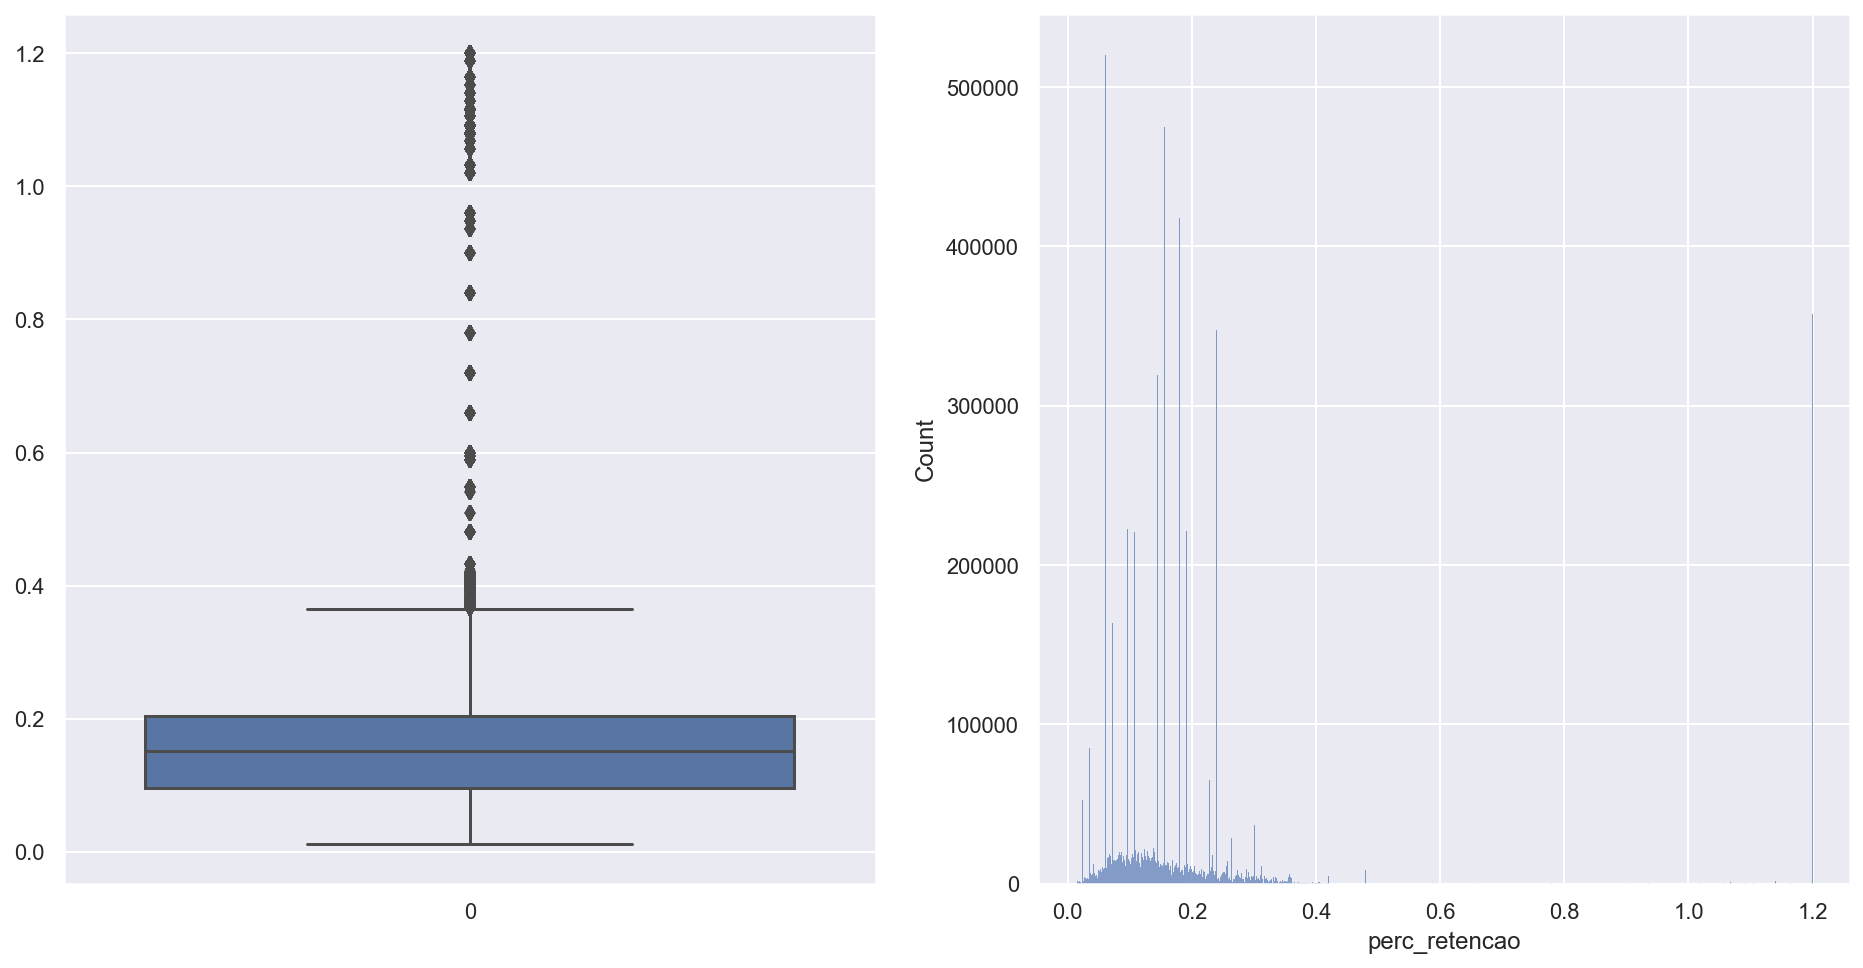

In [48]:
# plotando gráficos pra verificar possíveis outlies
plt.subplot( 1, 2, 1 )
sns.boxplot( data=portfolio_geral_tpv['perc_retencao'] );

plt.subplot( 1, 2, 2 )
sns.histplot( data=portfolio_geral_tpv['perc_retencao'], kde=False );

Observando os outliers e fazendo uma pesquisa sobre taxas de retenção decidi correr o risco de tomar todos os valores como erro de digitação e dividi-los por 10, pois representam taxas muito acima do comum.

In [49]:
portfolio_geral_tpv[ 'perc_retencao' ] = portfolio_geral_tpv[ 'perc_retencao' ].apply( lambda x: x/10 )

#### Valor mínimo do pagamento realizado negativo

In [50]:
len(portfolio_geral_tpv.loc[portfolio_geral_tpv['vlr_pgto_realizado'] < 0])

276

Por serem poucas linhas comparada ao tamanho total do dataset, vou dropar.

In [51]:
portfolio_geral_tpv = portfolio_geral_tpv.loc[portfolio_geral_tpv['vlr_pgto_realizado'] >= 0]

#### Valor mínimo do pagamento esperado de centavos

<AxesSubplot:>

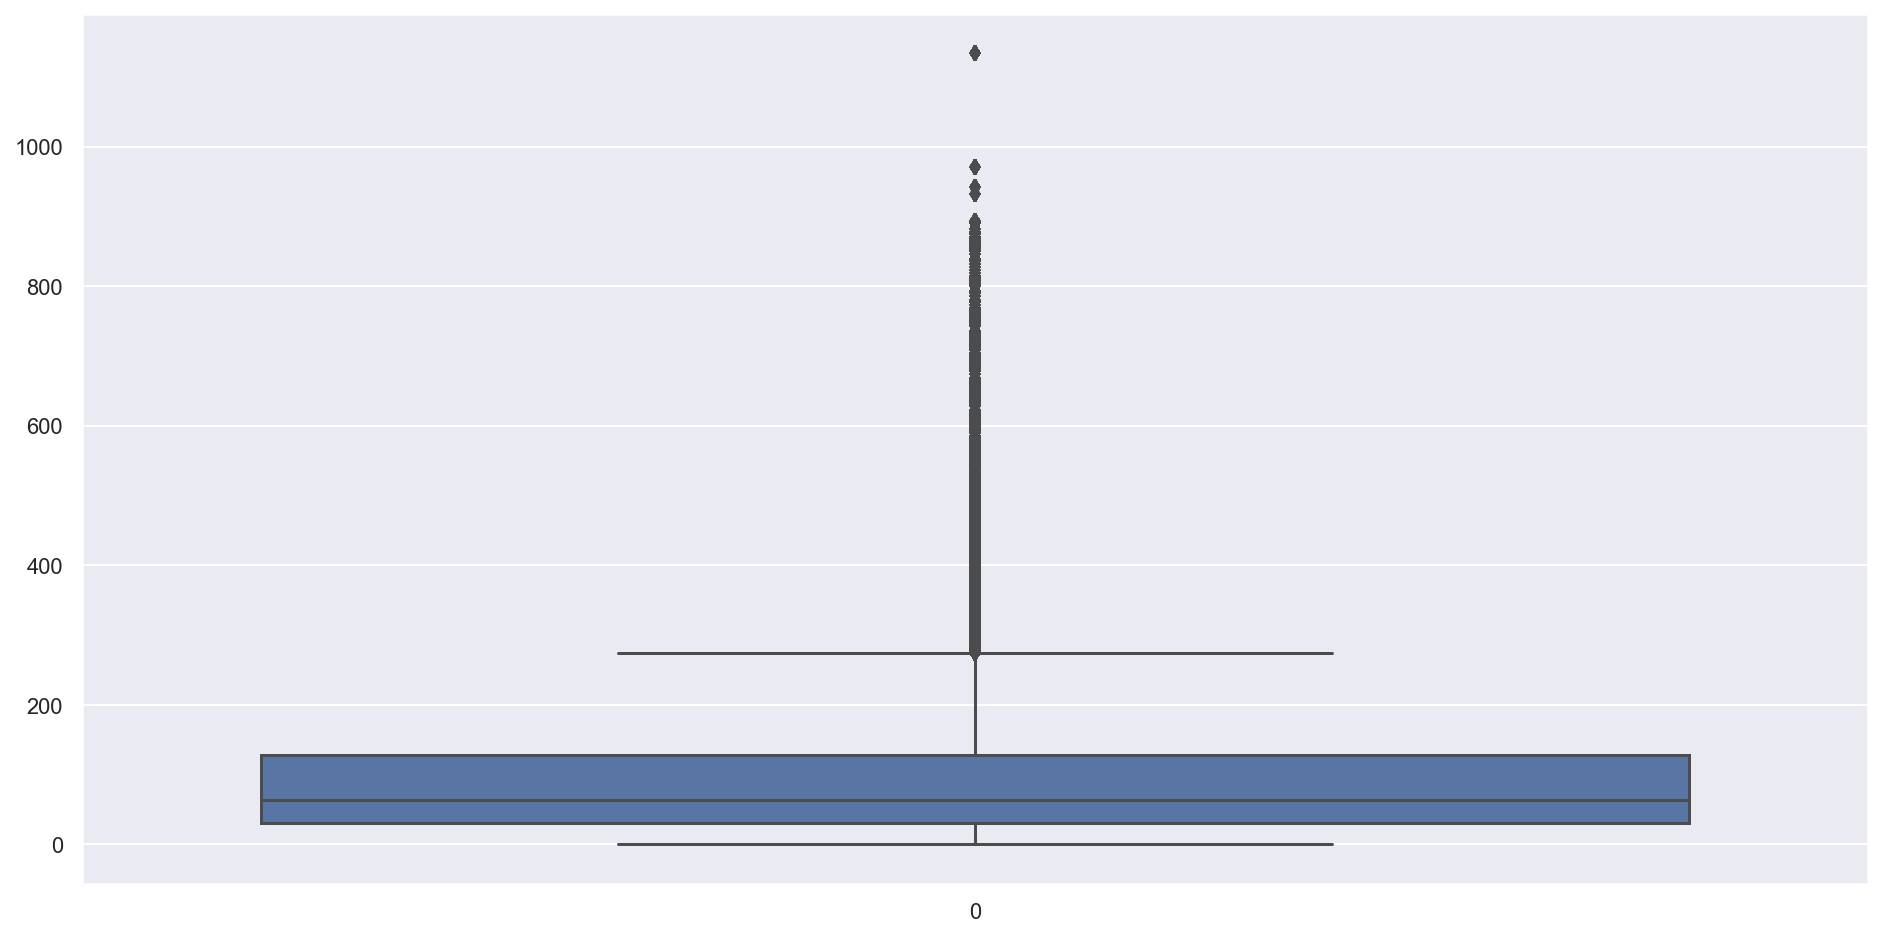

In [52]:
# verificando outliers
sns.boxplot( data=portfolio_geral_tpv['vlr_pgto_esperado'] )

In [53]:
portfolio_geral_tpv.sort_values( 'vlr_pgto_esperado' ).head()

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao,qtd_transacoes,vlr_tpv
6963050,4cda784dec348d65ba01ae6c4616e0f3,2022-04-05,2020-07-01,7a05e7c4c56900441aece46a8f0b898b,Settled,2020-07-04,2020-07-07,2021-10-04,2022-10-04,25,171.0200,1.7102,0.0719,0.0023,0.0012,0.0000,0.5700,0.0000,0.0000,0,0,0,0.0000,0.0000
6499653,4cda784dec348d65ba01ae6c4616e0f3,2021-10-11,2020-07-01,7a05e7c4c56900441aece46a8f0b898b,Settled,2020-07-04,2020-07-07,2021-10-04,2022-10-04,25,171.0200,1.7102,0.0719,0.0023,0.0012,0.0000,0.5700,0.0000,0.0000,0,0,0,0.0000,0.0000
6649825,4cda784dec348d65ba01ae6c4616e0f3,2022-01-16,2020-07-01,7a05e7c4c56900441aece46a8f0b898b,Settled,2020-07-04,2020-07-07,2021-10-04,2022-10-04,25,171.0200,1.7102,0.0719,0.0023,0.0012,0.0000,0.5700,0.0000,0.0000,0,0,0,0.0000,0.0000
5113567,4cda784dec348d65ba01ae6c4616e0f3,2022-02-25,2020-07-01,7a05e7c4c56900441aece46a8f0b898b,Settled,2020-07-04,2020-07-07,2021-10-04,2022-10-04,25,171.0200,1.7102,0.0719,0.0023,0.0012,0.0000,0.5700,0.0000,0.0000,0,0,0,0.0000,0.0000
3326622,4cda784dec348d65ba01ae6c4616e0f3,2021-09-03,2020-07-01,7a05e7c4c56900441aece46a8f0b898b,Settled,2020-07-04,2020-07-07,2021-10-04,2022-10-04,25,171.0200,1.7102,0.0719,0.0023,0.0012,0.0000,0.5700,0.0000,7.1700,0,0,0,0.0000,0.0000


In [54]:
portfolio_geral_tpv.loc[portfolio_geral_tpv['contrato_id'] == '389de7ac4703ea59ceb9e2c41668a9a1' ].sort_values('dt_ref_portfolio')

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao,qtd_transacoes,vlr_tpv
4768777,389de7ac4703ea59ceb9e2c41668a9a1,2021-02-25,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,DisbursementConfirmed,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.6900,343.3000,342.7200,0,0,0,0.0000,0.0000
6932566,389de7ac4703ea59ceb9e2c41668a9a1,2021-02-26,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,343.4400,342.1600,1,1,0,0.0000,0.0000
7507737,389de7ac4703ea59ceb9e2c41668a9a1,2021-02-27,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,343.5700,341.6000,2,2,0,0.0000,0.0000
1958338,389de7ac4703ea59ceb9e2c41668a9a1,2021-02-28,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,343.7300,341.0400,3,3,0,0.0000,0.0000
7497239,389de7ac4703ea59ceb9e2c41668a9a1,2021-03-01,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,343.8600,340.4700,4,4,0,0.0000,0.0000
2367756,389de7ac4703ea59ceb9e2c41668a9a1,2021-03-02,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,344.0000,339.9100,5,5,0,0.0000,0.0000
8038773,389de7ac4703ea59ceb9e2c41668a9a1,2021-03-03,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,344.1400,339.3500,6,6,0,0.0000,0.0000
4765393,389de7ac4703ea59ceb9e2c41668a9a1,2021-03-04,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,344.2900,338.7800,7,7,0,0.0000,0.0000
2726828,389de7ac4703ea59ceb9e2c41668a9a1,2021-03-05,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,344.4300,338.2200,8,8,0,0.0000,0.0000
5722414,389de7ac4703ea59ceb9e2c41668a9a1,2021-03-06,2021-02-01,76fdeebbddc25ce151c4ad4ecb9d70db,Active,2021-02-24,2021-02-25,2022-08-24,2023-08-24,30,342.0000,3.4200,0.0119,0.0004,0.0012,0.0000,0.7000,344.5700,337.6500,9,9,0,0.0000,0.0000


Dá pra notar que o valor do pagamento esperado também apresenta erro de digitação, está dividido. Porém decidi não mexer nisso, posso acabar mascarando os dados originais. Normalmente, pediria a opinião de outras pessoas da empresa para ver o que poderia estar acontecendo.

#### Valor do saldo devedor máximo negativo ( A stone está devendo pro próprio cliente? Muito estranho )

In [64]:
len( portfolio_geral_tpv.loc[ portfolio_geral_tpv['vlr_saldo_devedor'] < 0 ] )

124786

Como representam poucas linhas do dataset, vou dropar

In [65]:
portfolio_geral_tpv = portfolio_geral_tpv.loc[ portfolio_geral_tpv['vlr_saldo_devedor'] >= 0 ]

#### Verificar se existem dias com flag 1, porém tpv 0 ( não faz sentido, já que tpv 0 indica que não teve transação e flag 1 indica que sim )

In [66]:
portfolio_geral_tpv.loc[ (portfolio_geral_tpv['flag_transacao'] == 1) & (portfolio_geral_tpv['vlr_tpv'] == 0) ].head()

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao,qtd_transacoes,vlr_tpv
11,cfeefa8570edffa0750d0f8dd110776a,2022-03-24,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,0.0000,4.7000,0.0000,0.0000,0,0,1,0.0000,0.0000
15,6b9ba4dd3a051b7fd3ca968570f78d64,2021-12-05,2020-12-01,bbc8aa25a16444d9dfdeba9510437d6d,Settled,2020-12-02,2020-12-04,2022-06-02,2023-06-02,30,81242.1000,812.4210,0.0659,0.0021,0.0156,0.0000,234.0500,0.0000,16950.6300,0,0,1,0.0000,0.0000
30,234fab37dd12d08c45e745eb57191f6d,2021-07-22,2021-03-01,fd509da9fafcab567c455c33cec913d5,Active,2021-03-24,2021-03-29,2022-06-24,2023-06-24,25,256500.0000,2565.0000,0.0719,0.0023,0.0132,0.0000,862.9200,160449.5400,182384.8800,0,0,1,0.0000,0.0000
31,545a8b5fb448cdf990b47e9efb83a9d2,2021-07-22,2020-12-01,2aca361fe0e9c5ff6ead61b80bc7446e,Active,2020-11-30,2020-12-02,2022-02-28,2023-02-28,25,32320.7100,323.2071,0.0599,0.0019,0.0180,136.5100,102.0500,3707.1400,16345.0800,0,0,1,0.0000,0.0000
34,66c8d85f4ffb7be0d42d3768739ae1ca,2021-07-22,2020-10-01,c8d541c599700cfddeb9974005a1ca7d,Active,2020-10-16,2020-10-20,2022-01-16,2023-01-16,25,34200.0000,342.0000,0.0599,0.0019,0.0168,0.0000,106.7000,43454.3500,14353.4000,2,248,1,0.0000,0.0000


In [67]:
len( portfolio_geral_tpv.loc[ (portfolio_geral_tpv['flag_transacao'] == 1) & (portfolio_geral_tpv['vlr_tpv'] == 0) ] )

2053881

Se a quantidade de transações e o valor do tpv é igual a 0, não houve transação. Como são muitas linhas, não posso dropar. Vou assumir que as flags estão erradas e atribuir o valor 1 a elas

Tomo como premissa desse dataset que o valor do pagamento realizado não tem a ver com a maquininha, e sim como algo que o cliente pague diretamente a stone. O valor pago através da maquinha é descontado de acordo com o percentual de transação e somado ao valor do pagamento realizado, se houver.

In [68]:
portfolio_geral_tpv['flag_transacao'] = portfolio_geral_tpv['vlr_tpv'].apply( lambda x: 1 if x > 0 else 0 )

#### Quantidade mínima de transações negativa

In [69]:
len( portfolio_geral_tpv.loc[ portfolio_geral_tpv['qtd_transacoes'] < 0 ] )

4

Valor insignificante, vou dropar

In [70]:
portfolio_geral_tpv = portfolio_geral_tpv.loc[ portfolio_geral_tpv['qtd_transacoes'] >= 0 ]

#### Valor mínimo de tpv negativo

In [71]:
len( portfolio_geral_tpv.loc[ portfolio_geral_tpv['vlr_tpv'] < 0 ] )

763

Valor insignificante, vou dropar

In [72]:
portfolio_geral_tpv = portfolio_geral_tpv.loc[ portfolio_geral_tpv['vlr_tpv'] >= 0 ]

#### Por que existe mais de uma linha 'Settled' para um mesmo contrato?

In [84]:
portfolio_geral_tpv.loc[portfolio_geral_tpv['status_contrato'] == 'Settled'].head()

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao,qtd_transacoes,vlr_tpv
0,356c02706c8e74b15004bb5964ade6bb,2022-03-01,2020-06-01,b0871d4e0d72afd1d44381e5b2453cb2,Settled,2020-06-24,2020-06-29,2020-12-24,2021-12-24,10,22686.5700,226.8657,0.1079,0.0034,0.0240,0.0000,163.0000,0.5500,0.0000,0,0,0,0.0000,0.0000
1,1eb0e13f83f336146227ccc9efb08c47,2022-03-01,2020-07-01,938513461b4a4fcd2bf99ffd8f12b9be,Settled,2020-07-26,2020-07-28,2021-10-26,2022-10-26,25,16074.0000,160.7400,0.0479,0.0016,0.0084,0.0000,46.8700,0.0000,0.0000,0,0,0,0.0000,0.0000
2,8b03675f597974ca96f06648e96af6d4,2022-03-01,2020-08-01,4303bd71ee3fe80aba4efc8dbd6c7d70,Settled,2020-08-13,2020-08-17,2022-02-13,2023-02-13,30,17100.0000,171.0000,0.0539,0.0018,0.0081,0.0000,45.5700,0.0000,0.0000,0,0,0,0.0000,0.0000
10,5d441ec4bdedaa91e530cbfd72ac3966,2022-03-24,2020-07-01,d41d3e7f476557383c0ce4392448f55d,Settled,2020-07-21,2020-07-23,2021-10-21,2022-10-21,25,23921.1900,239.2119,0.0479,0.0016,0.0108,0.0000,69.7500,0.0000,0.0000,0,0,0,0.0000,0.0000
11,cfeefa8570edffa0750d0f8dd110776a,2022-03-24,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,0.0000,4.7000,0.0000,0.0000,0,0,0,0.0000,0.0000


In [88]:
portfolio_geral_tpv.loc[(portfolio_geral_tpv['contrato_id'] == 'cfeefa8570edffa0750d0f8dd110776a') & (portfolio_geral_tpv['status_contrato'] == 'Settled')].sort_values('dt_ref_portfolio').head()

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,vlr_desembolsado,vlr_tarifa,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao,qtd_transacoes,vlr_tpv
2821190,cfeefa8570edffa0750d0f8dd110776a,2021-07-16,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,368.2500,4.7500,0.0000,1175.5400,0,0,0,0.0000,0.0000
1161990,cfeefa8570edffa0750d0f8dd110776a,2021-07-17,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,0.0000,4.7500,0.0000,1170.8700,0,0,0,0.0000,0.0000
3509672,cfeefa8570edffa0750d0f8dd110776a,2021-07-18,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,0.0000,4.7500,0.0000,1166.1900,0,0,0,0.0000,0.0000
5009680,cfeefa8570edffa0750d0f8dd110776a,2021-07-19,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,0.0000,4.7500,0.0000,1161.5100,0,0,0,0.0000,0.0000
373907,cfeefa8570edffa0750d0f8dd110776a,2021-07-20,2020-12-01,d4fa3e5733ed42bc71d83e06cf5f2bf0,Settled,2020-12-09,2020-12-11,2022-09-09,2023-09-09,35,1710.0000,17.1000,0.0719,0.0023,0.0024,0.0000,4.7500,0.0000,1156.8400,0,0,0,0.0000,0.0000


Quando está quitado, teoricamente acabou a necessidade de uma régua de acionamento para esse cliente pagar a dívida. Portanto, essas linhas não seriam úteis para a nossa análise. Vou dropar.

In [111]:
# drop das linhas abaixo do primeiro status contrato 'settled' de cada contrato
portfolio_aux_drop_settled_duplicates = portfolio_geral_tpv.loc[portfolio_geral_tpv['status_contrato'] =='Settled']
portfolio_aux_drop_settled_duplicates = portfolio_aux_drop_settled_duplicates.sort_values( 'dt_ref_portfolio' ).drop_duplicates( subset=['contrato_id','status_contrato'], keep='first')

In [112]:
# drop de todas as linhas 'settled' do dataset oringinal e merge com o dataset somente com os primeiros 'settled'
portfolio_geral_tpv = portfolio_geral_tpv.loc[portfolio_geral_tpv['status_contrato'] != 'Settled' ]
portfolio_geral_tpv = pd.concat( [ portfolio_geral_tpv, portfolio_aux_drop_settled_duplicates], axis=0 )

### Dimensões dos dados pós limpeza

In [117]:
portfolio_geral_tpv.shape

(5827638, 24)

## Exportando datasets limpos

In [118]:
# Exportando datasets limpos pra csv 
portfolio_clientes.to_csv('../../datasets/datasets_transformados/portfolio_clientes_limpo.csv')
portfolio_comunicados.to_csv('../../datasets/datasets_transformados/portfolio_comunicados_limpo.csv')
portfolio_geral_tpv.to_csv('../../datasets/datasets_transformados/portfolio_geral_tpv_limpo.csv')